In [ ]:
import pandas as pd

data_path = 'top_insta_influencers_data.csv'
data = pd.read_csv(data_path)


In [9]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return value

data['posts'] = data['posts'].apply(convert_to_numeric)
data['followers'] = data['followers'].apply(convert_to_numeric)
data['avg_likes'] = data['avg_likes'].apply(convert_to_numeric)
data['60_day_eng_rate'] = data['60_day_eng_rate'].apply(convert_to_numeric)
data['new_post_avg_like'] = data['new_post_avg_like'].apply(convert_to_numeric)
data['total_likes'] = data['total_likes'].apply(convert_to_numeric)

data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10,United States


In [ ]:
data = data.dropna(subset=['60_day_eng_rate'])

X = data[['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']]
y = data['60_day_eng_rate']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_features = SelectKBest(score_func=f_regression, k='all')
X_train_best = best_features.fit_transform(X_train_scaled, y_train)
X_test_best = best_features.transform(X_test_scaled)

results = []
for k in range(1, X_train_best.shape[1] + 1):

    X_train_k = X_train_best[:, :k]
    X_test_k = X_test_best[:, :k]

    model = LinearRegression()
    model.fit(X_train_k, y_train)

    y_pred = model.predict(X_test_k)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((k, r2, mse, mae))

for result in results:
    print(f'Número de variáveis: {result[0]}, R²: {result[1]:.4f}, MSE: {result[2]:.4f}, MAE: {result[3]:.4f}')


Número de variáveis: 1, R²: 0.0216, MSE: 0.0006, MAE: 0.0159
Número de variáveis: 2, R²: 0.5609, MSE: 0.0003, MAE: 0.0103
Número de variáveis: 3, R²: 0.9528, MSE: 0.0000, MAE: 0.0035
Número de variáveis: 4, R²: 0.9334, MSE: 0.0000, MAE: 0.0044


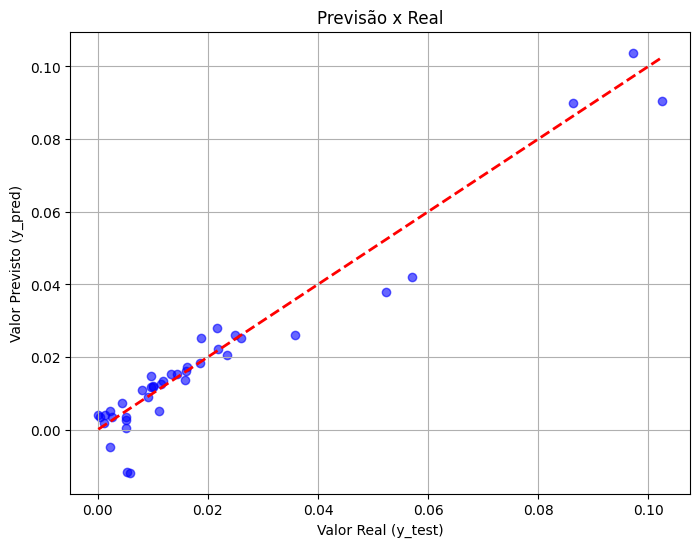

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Previsão x Real')
plt.xlabel('Valor Real (y_test)')
plt.ylabel('Valor Previsto (y_pred)')
plt.grid()
plt.show()


1. Previsão x Real (Gráfico de Dispersão)

°O que estamos analisando?
Este gráfico compara os valores reais (y_test) com os valores previstos (y_pred) pelo modelo. Idealmente, os pontos devem se alinhar ao longo da linha diagonal (em vermelho), indicando que o modelo está fazendo previsões precisas.

°Por que um gráfico de dispersão?
Um gráfico de dispersão permite visualizar a relação entre duas variáveis contínuas e identificar desvios significativos entre valores reais e previstos.

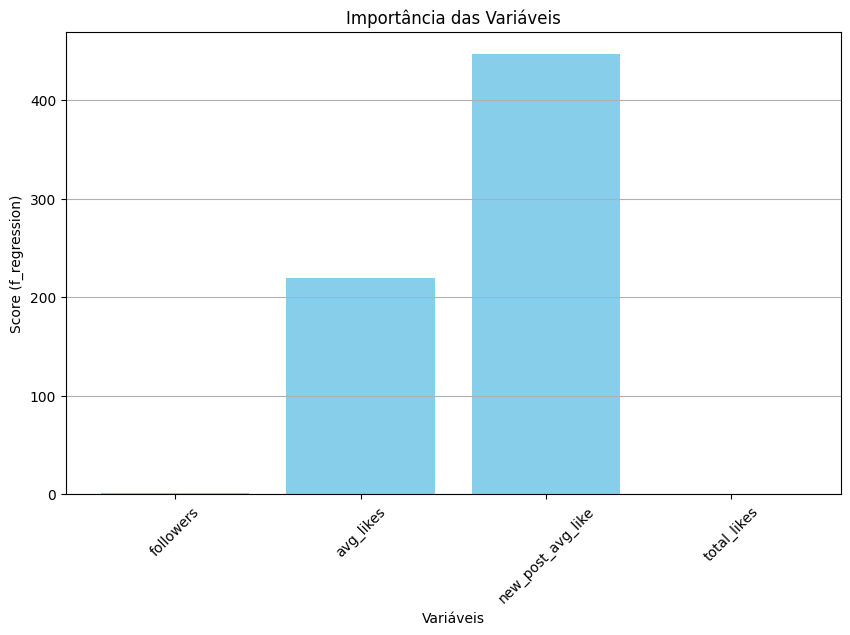

In [ ]:
import numpy as np

feature_scores = best_features.scores_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_scores, color='skyblue')
plt.title('Importância das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Score (f_regression)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


2. Importância das Variáveis (Gráfico de Barras)

°O que estamos analisando?
Este gráfico exibe a relevância de cada variável na predição do modelo, com base nos scores calculados pelo SelectKBest. Variáveis com scores mais altos são mais importantes para explicar a variável dependente (60_day_eng_rate).

°Por que um gráfico de barras?
Gráficos de barras são ideais para comparar valores entre categorias (neste caso, as variáveis do dataset), destacando visualmente as diferenças na importância.

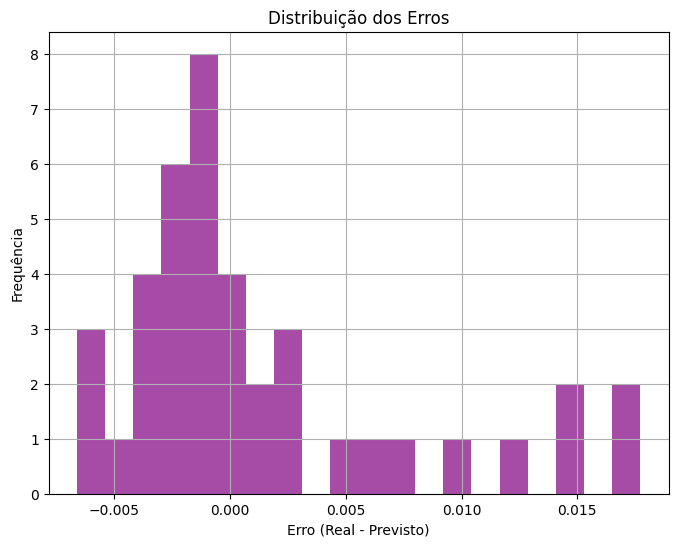

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='purple', alpha=0.7)
plt.title('Distribuição dos Erros')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.grid()
plt.show()


3. Distribuição dos Erros (Histograma)
°O que estamos analisando?
Este gráfico mostra a distribuição dos erros (diferença entre valores reais e previstos). Idealmente, a distribuição deve ser centrada em zero e simétrica, indicando que o modelo não apresenta vieses significativos.

°Por que um histograma?
Um histograma é apropriado para visualizar a frequência de valores em intervalos, ajudando a identificar padrões ou assimetrias nos erros do modelo.